<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 5: Practical - Lasso & Ridge Regression <br> <br>
<font color=686880 size=4>
    TAs: Alireza Dehghanpour - Arman Malekzadeh - Ali Salesi
    
____

### Full Name : Mohammad Abolnejadian
### Student Number : 98103867
### Colab Link:
___

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.

In this assignment you have to predict **life expectancy**.

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Data Exploration (20 points)

In [44]:
!wget -O /content/dataset.csv "https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1"

860.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
/content/dataset.csv: No such file or directory


Load the dataset as a dataframe

In [45]:
df = pd.read_csv("dataset.csv")
df = df.rename(columns={"Life expectancy ": "Life expectancy"})
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Finland,2013,Developing,87.0,79.0,0,8.97,6115.496624,NaN,2,...,98.0,9.55,98.0,0.1,49638.771300,5438972.0,0.9,0.8,0.887,17.0
1,Japan,2015,Developed,83.7,55.0,2,NaN,0.000000,NaN,35,...,99.0,NaN,96.0,0.1,34474.137360,127141.0,2.1,1.8,0.902,15.3
2,Syrian Arab Republic,2014,Developing,64.4,294.0,7,0.01,0.000000,47.0,594,...,52.0,3.25,43.0,0.1,NaN,19239.0,6.3,6.1,0.575,9.0
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,Tunisia,2000,Developing,72.9,112.0,4,1.21,264.784220,94.0,47,...,97.0,5.40,97.0,0.1,2213.914880,9699197.0,6.6,6.5,0.646,12.8
2493,Myanmar,2001,Developing,62.5,239.0,72,0.38,1.917164,NaN,2519,...,77.0,1.80,73.0,0.4,138.924927,46627994.0,13.3,13.7,0.427,7.6
2494,Netherlands,2008,Developed,83.0,68.0,1,9.62,10873.405540,NaN,109,...,97.0,9.57,97.0,0.1,56928.824800,16445593.0,1.0,0.9,0.905,16.8
2495,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9


Plot "year" against "average life expectancy"

**It should have been plot "average life expectency" against "year".** [Read More](https://english.stackexchange.com/questions/107800/is-x-plotted-against-y-or-is-y-plotted-against-x)

<Axes: title={'center': 'Life expectancy for all countries through years'}, xlabel='Year'>

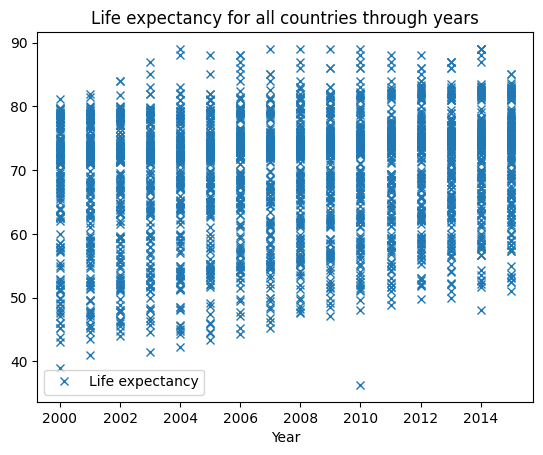

In [46]:
df.plot(x="Year", y="Life expectancy", style='x', title='Life expectancy for all countries through years')

<Axes: title={'center': 'Life expectancy through years'}, xlabel='Year'>

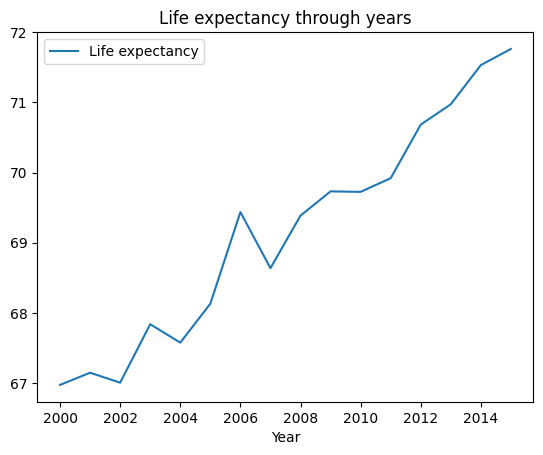

In [47]:
df.groupby("Year", as_index=False)["Life expectancy"].mean().plot(x="Year", y="Life expectancy", title='Life expectancy through years')

Compare the average life expectancy of "Developed" and "Developing" countries for each year 

In [48]:
average_life_expectancy_based_on_status = df.groupby(["Year", "Status"], as_index=False)["Life expectancy"].mean()
average_life_expectancy_based_on_status

,Year,Status,Life expectancy
0,2000,Developed,76.891667
1,2000,Developing,65.004959
2,2001,Developed,77.114286
3,2001,Developing,65.048120
4,2002,Developed,77.710000
5,2002,Developing,64.393496
6,2003,Developed,78.257692
7,2003,Developing,65.617213
8,2004,Developed,78.452000
9,2004,Developing,65.500000


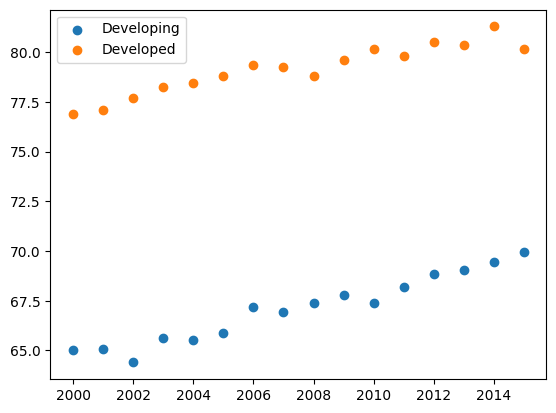

In [49]:
import matplotlib.pyplot as plt
developing_df = average_life_expectancy_based_on_status.loc[average_life_expectancy_based_on_status['Status'] == "Developing"]
developed_df = average_life_expectancy_based_on_status.loc[average_life_expectancy_based_on_status['Status'] == "Developed"]
plt.scatter(x = developing_df.loc[:, "Year"], y = developing_df.loc[:, "Life expectancy"])
plt.scatter(x = developed_df.loc[:, "Year"], y = developed_df.loc[:, "Life expectancy"])
status = ['Developing', 'Developed']
plt.legend(labels=status)
plt.show()

# average_life_expectancy_based_on_status.plot(x="Year", y="Life expectancy", style = 'x',title='Life expectancy through years')

Get the correlation between "Life expectancy" and "GDP"

In [50]:
correlation_lifeexpectancy_gdp = df['Life expectancy'].corr(df['GDP'])
correlation_lifeexpectancy_gdp

0.46525538795006427

Find out the feature having the strongest correlation with the "Life expectancy"<br>
Note: Do not display all of the correlation values. Your code should only print the result (the name of a column).

In [51]:
correlation = df.drop(columns = ["Country", "Status"]).corr()['Life expectancy']
correlation = correlation.drop('Life expectancy').abs()
max_correlation = correlation.max()
max_correlation_column = correlation.idxmax()
print(str(max_correlation_column) + ": " + str(max_correlation))

Schooling: 0.7503972851868812


# Preprocessing (20 points)

Remove the rows containing NaN (or null) values

In [52]:
df = df.dropna()
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
7,Colombia,2005,Developing,73.1,144.0,15,4.38,531.980818,93.0,0,...,93.0,5.82,93.0,0.1,3386.256000,43285634.0,2.4,2.1,0.658,11.1
11,Botswana,2012,Developing,63.4,3.0,2,0.01,12.834474,95.0,7,...,96.0,6.27,95.0,4.4,729.231453,289315.0,7.3,7.0,0.687,12.5
12,Mexico,2014,Developing,76.6,122.0,31,5.26,168.173753,84.0,3,...,87.0,6.30,87.0,0.1,1452.277660,1242216.0,1.6,1.5,0.754,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,Mauritius,2009,Developing,72.8,166.0,0,2.83,624.236183,99.0,15,...,99.0,4.97,99.0,0.1,7318.126410,1247429.0,7.3,7.3,0.734,13.8
2485,Mali,2009,Developing,56.0,276.0,55,0.59,84.634389,71.0,2939,...,77.0,6.85,73.0,1.6,697.153124,1466597.0,9.0,8.8,0.385,7.1
2488,Turkmenistan,2008,Developing,64.5,235.0,6,2.40,34.239794,96.0,0,...,96.0,1.93,96.0,0.1,394.467675,4935762.0,3.2,3.3,0.000,10.5
2490,Angola,2007,Developing,48.2,375.0,87,6.35,184.821345,73.0,1014,...,75.0,3.38,73.0,2.6,2878.837144,2997687.0,9.6,9.6,0.454,7.7


Convert categorical columns into their one-hot encoded versions

In [53]:
df = pd.get_dummies(df, columns=['Country', 'Status'])
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
3,2010,72.8,18.0,0,9.80,1109.969508,91.0,0,58.9,0,...,False,False,False,False,False,False,False,False,True,False
4,2013,67.1,192.0,0,0.01,200.660099,97.0,0,29.3,0,...,False,False,False,False,False,False,False,False,False,True
7,2005,73.1,144.0,15,4.38,531.980818,93.0,0,5.5,18,...,False,False,False,False,False,False,False,False,False,True
11,2012,63.4,3.0,2,0.01,12.834474,95.0,7,36.2,3,...,False,False,False,False,False,False,False,False,False,True
12,2014,76.6,122.0,31,5.26,168.173753,84.0,3,62.8,36,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,2009,72.8,166.0,0,2.83,624.236183,99.0,15,3.2,0,...,False,False,False,False,False,False,False,False,False,True
2485,2009,56.0,276.0,55,0.59,84.634389,71.0,2939,2.2,93,...,False,False,False,False,False,False,False,False,False,True
2488,2008,64.5,235.0,6,2.40,34.239794,96.0,0,42.7,8,...,True,False,False,False,False,False,False,False,False,True
2490,2007,48.2,375.0,87,6.35,184.821345,73.0,1014,18.8,138,...,False,False,False,False,False,False,False,False,False,True


Convert the dataframe into two numpy arrays (called `x` and `y`).<br>
To make the first array, remove the "Life expectancy" column, and convert the remaining dataframe to a numpy array.<br>
Then, use the removed column to make another numpy array (`y`).

In [54]:
x_df = df.drop("Life expectancy", axis = 1)
x = x_df.to_numpy()
y = df.loc[:, "Life expectancy"].values
x, y

(array([[2010, 18.0, 0, ..., False, True, False],
        [2013, 192.0, 0, ..., False, False, True],
        [2005, 144.0, 15, ..., False, False, True],
        ...,
        [2008, 235.0, 6, ..., False, False, True],
        [2007, 375.0, 87, ..., False, False, True],
        [2000, 112.0, 4, ..., False, False, True]], dtype=object),
 array([72.8, 67.1, 73.1, ..., 64.5, 48.2, 72.9]))

Normalize the data

In [55]:
x = preprocessing.normalize(x)
x

array([[6.74996354e-03, 6.04474347e-05, 0.00000000e+00, ...,
        0.00000000e+00, 3.35819082e-06, 0.00000000e+00],
       [1.06367098e-01, 1.01452970e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.28400884e-05],
       [4.63202177e-05, 3.32673883e-06, 3.46535295e-07, ...,
        0.00000000e+00, 0.00000000e+00, 2.31023530e-08],
       ...,
       [4.06826712e-04, 4.76116918e-05, 1.21561766e-06, ...,
        0.00000000e+00, 0.00000000e+00, 2.02602944e-07],
       [6.69515692e-04, 1.25096355e-04, 2.90223544e-05, ...,
        0.00000000e+00, 0.00000000e+00, 3.33590280e-07],
       [2.06202627e-04, 1.15473471e-05, 4.12405255e-07, ...,
        0.00000000e+00, 0.00000000e+00, 1.03101314e-07]])

# Model Training

Split the data to training (80%) and testing (20%) parts (5 points)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)
X_train, y_train

(array([[2.81191034e-03, 3.24720357e-04, 1.39965671e-06, ...,
         0.00000000e+00, 0.00000000e+00, 1.39965671e-06],
        [3.72669409e-03, 3.44686773e-04, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.85315469e-06],
        [1.30694080e-03, 1.93958346e-04, 1.30173386e-06, ...,
         0.00000000e+00, 0.00000000e+00, 6.50866932e-07],
        ...,
        [7.44490987e-02, 6.82542808e-03, 8.16083793e-04, ...,
         0.00000000e+00, 0.00000000e+00, 3.70947178e-05],
        [1.39782376e-04, 3.22521245e-05, 1.94624889e-06, ...,
         6.95088890e-08, 0.00000000e+00, 6.95088890e-08],
        [2.42700512e-05, 1.10318414e-06, 3.63687081e-08, ...,
         0.00000000e+00, 1.21229027e-08, 0.00000000e+00]]),
 array([67.4, 68.5, 61.6, ..., 67.8, 54.9, 78.4]))

# Common Regression Class

This is a regression class and you do not need to change its code. You have to fully understand it and then create new classes for rigde and lasso regression which inherit from this class.
For initialization you have to specify learning rate, number of iteration, and a regularization object.

In [57]:
class Regression:
    def __init__(self, learning_rate, iteration, regularization):
        
        self.N = None # number of samples
        self.n = None # number of features
        self.w = None # initial weights
        self.regularization = regularization # will be the l1/l2 regularization class according to the regression model
        self.lr = learning_rate
        self.it = iteration

    def loss_function(self, y, y_pred):
        return (1 / (2*self.N)) * np.sum(np.square(y_pred - y)) + self.regularization(self.w)
    
    def hypothesis(self, weights, X):
        return np.dot(X, weights)

    def train(self, X, y):
        # Target value should be in the shape of (n, 1) not (n, ).

        # Insert constant ones for bias weights.
        X = np.insert(X, 0, 1, axis=1)

        self.N = X.shape[0]
        self.n = X.shape[1]
        self.w = np.zeros((self.n , 1))

        for it in range(1, self.it+1):
            y_pred = self.hypothesis(self.w, X)
            cost = self.loss_function(y, y_pred)
            dw = (1/self.N) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
            self.w = self.w - self.lr * dw

            if it % 10 == 0:
                print("The loss function for the iteration {}----->{} :)".format(it, cost))
    
    def predict(self, test_X):
        # Insert constant ones for bias weights.
        test_X = np.insert(test_X, 0, 1, axis=1)
        y_pred = self.hypothesis(self.w, test_X)
        return y_pred

# Regularization Classes (20 points)

You have to implement l2/l1 regularization.

In [58]:
class l1_regularization:
    """Regularization used for Lasso Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be returned when we call this class."
        return self.lamda * np.sum(np.abs(weights))
        
    
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        return self.lamda * np.sign(weights)
        


class l2_regularization:
    """Regularization used for Ridge Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be retuned when we call this class."
        return self.lamda * np.sum(np.square(weights))
    
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        # return 2 * self.lamda * np.sum(weights)
        return 2 * self.lamda * weights

# Lasso Regression from scratch (5 points)

Train a lasso regression model using your own code and the following class.

In [59]:
class LassoRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l1_regularization(lamda)
        super(LassoRegression, self).__init__(learning_rate, iteration, self.regularization)

In [60]:
lasso_regression_custom = LassoRegression(0.01, 1e-2, 10000)
y_train_reshaped = y_train.reshape(-1, 1)
lasso_regression_custom.train(X_train, y_train_reshaped)

The loss function for the iteration 10----->1720.1007462313755 :)
The loss function for the iteration 20----->1178.7522996664095 :)
The loss function for the iteration 30----->813.3990516017699 :)
The loss function for the iteration 40----->566.8102999761637 :)
The loss function for the iteration 50----->400.3659128595747 :)
The loss function for the iteration 60----->288.0044552098602 :)
The loss function for the iteration 70----->212.13928276769846 :)
The loss function for the iteration 80----->160.90265909045775 :)
The loss function for the iteration 90----->126.28606189304038 :)
The loss function for the iteration 100----->102.88522008836215 :)
The loss function for the iteration 110----->87.05324729330168 :)
The loss function for the iteration 120----->76.3291702814322 :)
The loss function for the iteration 130----->69.05228226255633 :)
The loss function for the iteration 140----->64.10191355930499 :)
The loss function for the iteration 150----->60.72181853460749 :)
The loss funct

# Lasso Regression using skicit-learn (5 points)

Use `sklearn` to train a Lasso Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [61]:
params = {'alpha': (np.logspace(-8, 8, 100))}
lasso_regression_sklearn = Lasso(max_iter=10000)
lasso_model = GridSearchCV(lasso_regression_sklearn, params, cv = 10)
lasso_model.fit(X_train, y_train_reshaped)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.826e+04, tolerance: 7.763e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.817e+04, tolerance: 7.727e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

KeyboardInterrupt: 

# Ridge Regression From scratch (5 points)

Train a ridge regression model using your own code and the following class.

In [29]:
class RidgeRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l2_regularization(lamda)
        super(RidgeRegression, self).__init__(learning_rate, iteration, self.regularization)

In [30]:
ridge_regression_custom = RidgeRegression(0.001, 1e-2, 20000)
y_train_reshaped = y_train.reshape(-1, 1)
ridge_regression_custom.train(X_train, y_train_reshaped)

The loss function for the iteration 10----->1719.0993452634277 :)
The loss function for the iteration 20----->1180.4715476453293 :)
The loss function for the iteration 30----->816.4569989115456 :)
The loss function for the iteration 40----->570.4326192489141 :)
The loss function for the iteration 50----->404.1370485856794 :)
The loss function for the iteration 60----->291.7163108178664 :)
The loss function for the iteration 70----->215.7003491759746 :)
The loss function for the iteration 80----->164.28429011878336 :)
The loss function for the iteration 90----->129.49133857682165 :)
The loss function for the iteration 100----->105.9314092593633 :)
The loss function for the iteration 110----->89.96230882071485 :)
The loss function for the iteration 120----->79.12292975155712 :)
The loss function for the iteration 130----->71.7502480726152 :)
The loss function for the iteration 140----->66.72052096030897 :)
The loss function for the iteration 150----->63.274408768468994 :)
The loss functi

# Ridge Regression using scikit-learn (5 points)

Use `sklearn` to train a Ridge Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [64]:
params = {'alpha': (np.logspace(-8, 8, 100))}
ridge_regression_sklearn = Ridge(max_iter=10000)
ridge_model = GridSearchCV(ridge_regression_sklearn, params, cv = 10)
ridge_model.fit(X_train, y_train_reshaped)

GridSearchCV(cv=10, estimator=Ridge(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8....
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

# Evaluation (15 points)

For each model (the 2 models trained using `sklearn` and the ones based on your code), predict the output for the testing samples.

In [65]:
y_pred_lasso_custom = lasso_regression_custom.predict(X_test)
y_pred_lasso_sklearn = lasso_model.predict(X_test)
y_pred_ridge_custom = ridge_regression_custom.predict(X_test)
y_pred_ridge_sklearn = ridge_model.predict(X_test)

Measure the performance of the models based on "mean squared error" and the "coefficient of determination" of the prediction.

In [66]:
#Custom Lasso
mse_lasso_custom = mean_squared_error(y_test, y_pred_lasso_custom)
r2_lasso_custom = r2_score(y_test, y_pred_lasso_custom)
print("Custom Lasso:" + "\n" + "MSE: " + str(mse_lasso_custom) + "\n" + "R2: " + str(r2_lasso_custom) + "\n")

#Sklearn Lasso
mse_lasso_sklearn = mean_squared_error(y_test, y_pred_lasso_sklearn)
r2_lasso_sklearn = r2_score(y_test, y_pred_lasso_sklearn)
print("Sklearn Lasso:" + "\n" + "MSE: " + str(mse_lasso_sklearn) + "\n" + "R2: " + str(r2_lasso_sklearn) + "\n")

#Custom Ridge
mse_ridge_custom = mean_squared_error(y_test, y_pred_ridge_custom)
r2_ridge_custom = r2_score(y_test, y_pred_ridge_custom)
print("Custom Ridge:" + "\n" + "MSE: " + str(mse_ridge_custom) + "\n" + "R2: " + str(r2_ridge_custom) + "\n")

#Sklearn Ridge
mse_ridge_sklearn = mean_squared_error(y_test, y_pred_ridge_sklearn)
r2_ridge_sklearn = r2_score(y_test, y_pred_ridge_sklearn)
print("Sklearn Ridge:" + "\n" + "MSE: " + str(mse_ridge_sklearn) + "\n" + "R2: " + str(r2_ridge_sklearn) + "\n")

Custom Lasso:
MSE: 4320.069707004878
R2: -53.236294603283795

Sklearn Lasso:
MSE: 74.87907068048602
R2: 0.05993106304236673

Custom Ridge:
MSE: 75.44993305772982
R2: 0.052764174040570655

Sklearn Ridge:
MSE: 74.97681982988134
R2: 0.05870387181088543



# Kaggle

Competition Link: https://www.kaggle.com/t/adbf95666e7c4f41a6be1129a9e4415c